Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt


Load Cleaned Dataset

In [2]:
DATA_PATH = "data/climate_clean_labeled.csv"
df = pd.read_csv(DATA_PATH)

df.head()


,date,state,city,avg_temperature,rainfall,humidity,wind_speed,cloud_cover,aqi,year,month,week,season,stress_level
0,2024-01-01,Maharashtra,Mumbai,25.2,0.0,77.6,3.3,62.1,259,2024,1,1,winter,Mild Stress
1,2024-01-01,Delhi,Delhi,18.1,0.0,84.1,9.0,46.0,130,2024,1,1,winter,Healthy
2,2024-01-01,Karnataka,Bengaluru,34.0,3.7,49.0,6.6,61.3,54,2024,1,1,winter,Healthy
3,2024-01-01,Tamil Nadu,Chennai,33.8,9.5,34.2,9.0,70.0,176,2024,1,1,winter,Healthy
4,2024-01-01,West Bengal,Kolkata,22.5,9.1,32.2,9.2,56.9,97,2024,1,1,winter,Healthy


In [3]:
features = [
    "avg_temperature",
    "rainfall",
    "humidity",
    "wind_speed",
    "cloud_cover",
    "aqi",
    "month",
    "week"
]

X = df[features]
y = df["stress_level"]


In [4]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

dict(zip(le.classes_, le.transform(le.classes_)))


{'Healthy': 0, 'Mild Stress': 1, 'Severe Stress': 2}

Train–Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

X_train.shape, X_test.shape


((5848, 8), (1462, 8))

Model Training

In [6]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
y_pred = model.predict(X_test)


In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.9911080711354309

Classification Report:

               precision    recall  f1-score   support

      Healthy       1.00      1.00      1.00       544
  Mild Stress       0.98      1.00      0.99       632
Severe Stress       1.00      0.96      0.98       286

     accuracy                           0.99      1462
    macro avg       0.99      0.99      0.99      1462
 weighted avg       0.99      0.99      0.99      1462



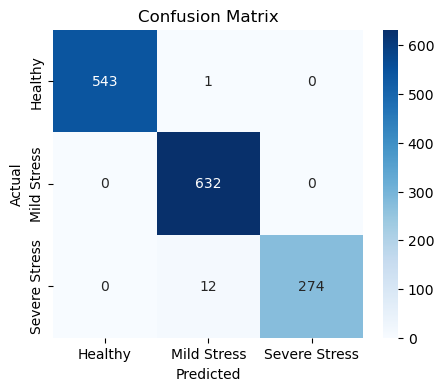

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


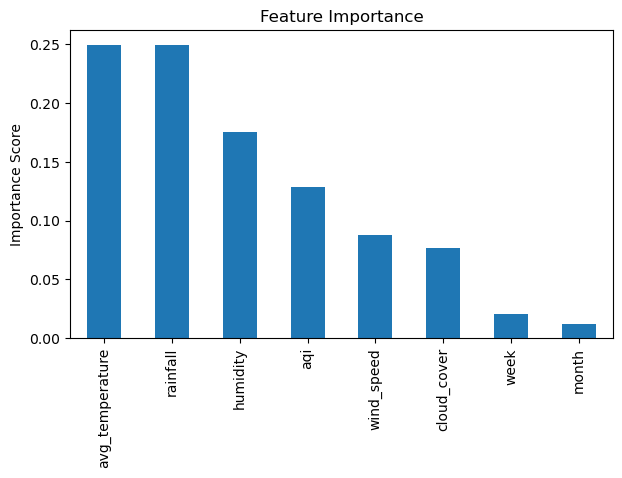

In [10]:
importances = pd.Series(
    model.feature_importances_,
    index=features
).sort_values(ascending=False)

importances.plot(kind="bar", figsize=(7,4))
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.show()
